In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.isnull().sum()
df.dropna(inplace=True)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [141]:
print(f'Shape:{df.shape}\n')
print(f'Columns:{df.columns}\n')
print(f'Describe:{df.describe()}')
print(f'info:{df.info()}\n')
print(f'Duplicates:{df.duplicated().sum()}')


Shape:(155, 16)

Columns:Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Sleep Efficiency', 'Stress Category', 'Age Group'],
      dtype='object')

Describe:        Person ID      Gender         Age  Sleep Duration  Quality of Sleep  \
count  155.000000  155.000000  155.000000      155.000000        155.000000   
mean   244.761290    0.664516   46.632258        6.812258          6.870968   
std     91.282997    0.473690    7.839311        0.773534          1.337325   
min      4.000000    0.000000   28.000000        5.800000          4.000000   
25%    199.500000    0.000000   43.000000        6.300000          6.000000   
50%    255.000000    1.000000   45.000000        6.500000          7.000000   
75%    304.500000    1.000000   51.000000        7.400000          8.000000   
max    374.000000    1.0

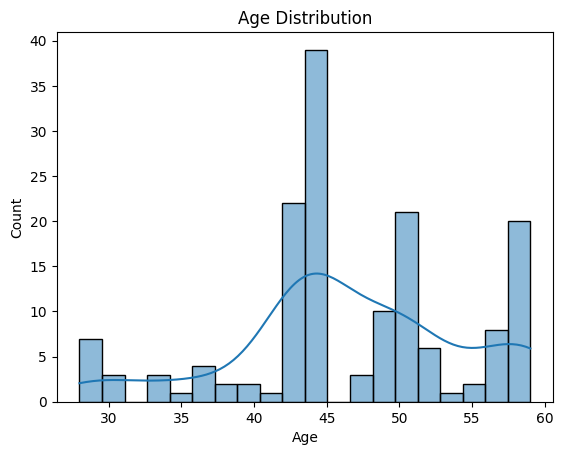

In [129]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.savefig('Age Distribution.png')
plt.show()

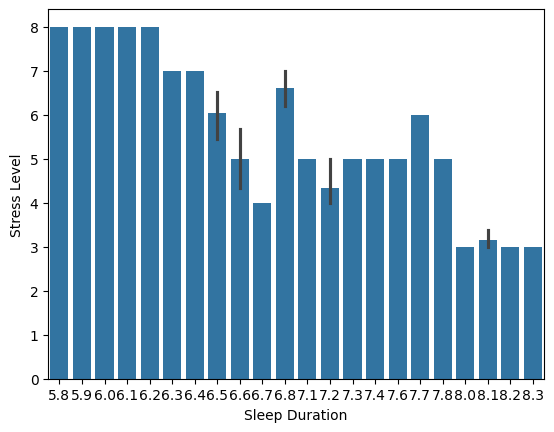

In [130]:
sns.barplot(x=df['Sleep Duration'],y=df['Stress Level']) #Sleep Duration vs Stress Level
plt.savefig('Sleep Duration vs Stress Level.png')

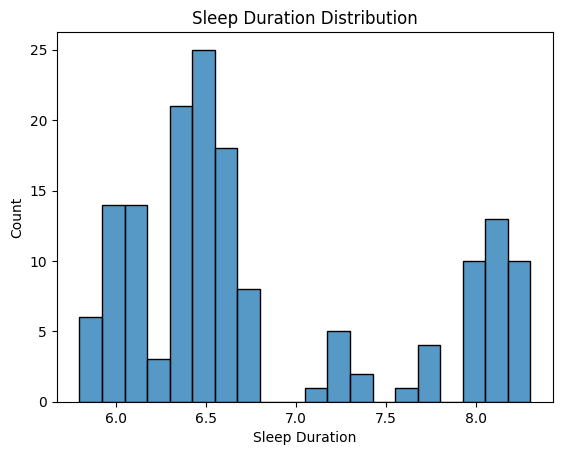

In [131]:
sns.histplot(df['Sleep Duration'], bins=20, edgecolor="black") #Sleep Duration Distribution
plt.title('Sleep Duration Distribution')
plt.show()


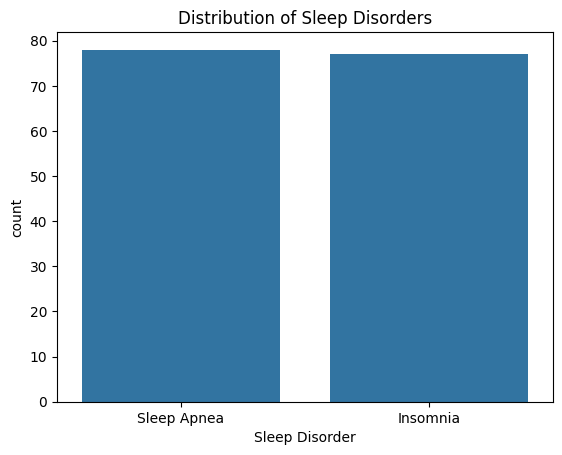

In [ ]:
#Distribution of Sleep Disorders
sns.countplot(x="Sleep Disorder", data=df)
plt.title('Distribution of Sleep Disorders')
plt.savefig('Distribution of Sleep Disorders')
plt.show()

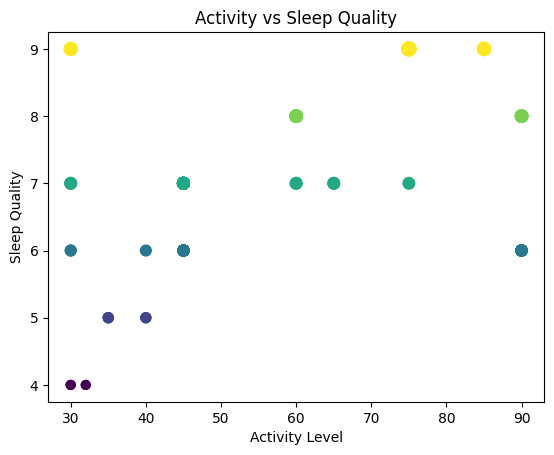

In [ ]:
#Activity vs Sleep Quality
plt.scatter(df['Physical Activity Level'], df['Quality of Sleep'],s=df['Quality of Sleep']*10,c=df['Quality of Sleep'])
plt.title('Activity vs Sleep Quality')
plt.xlabel('Activity Level')
plt.ylabel('Sleep Quality')
plt.show()

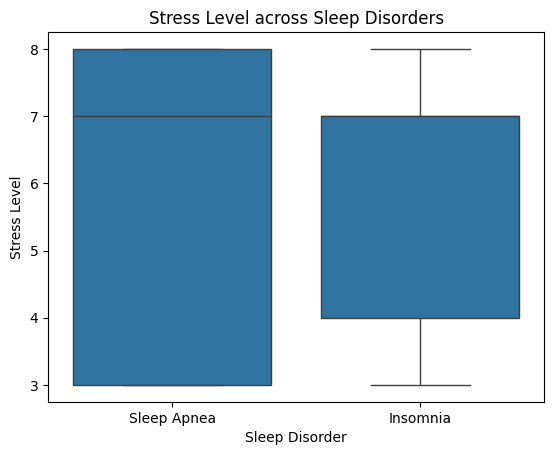

In [ ]:
#Stress Level across Sleep Disorders
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('Stress Level across Sleep Disorders')
plt.savefig('Stress Level across Sleep Disorders.png')
plt.show()

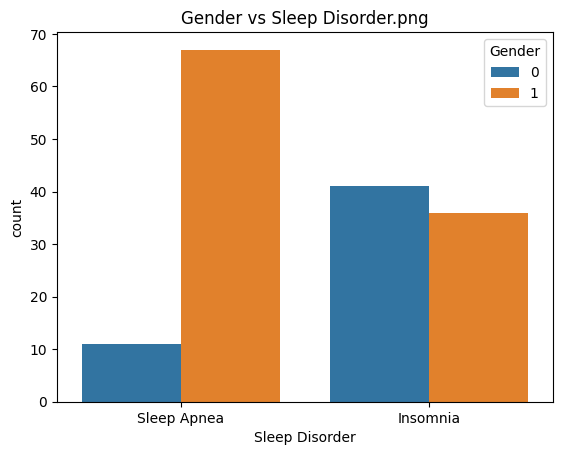

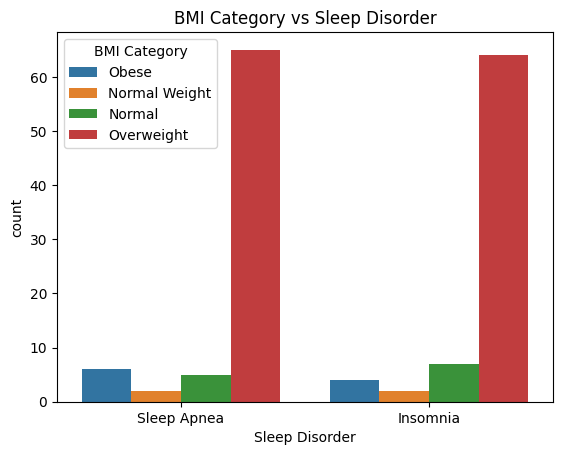

In [ ]:
sns.countplot(x='Sleep Disorder',hue='Gender',data=df)  #Gender vs Sleep Disorder
plt.title('Gender vs Sleep Disorder.png')
plt.savefig('Gender vs Sleep Disorder')
plt.show()
sns.countplot(x='Sleep Disorder',hue='BMI Category',data=df)  #BMI Category vs Sleep Disorder
plt.title('BMI Category vs Sleep Disorder')
plt.savefig('BMI Category vs Sleep Disorder.png')
plt.show()

Feature Engineering:

In [ ]:
# change Male - 0 , female -1
df['Gender'] = df['Gender'].str.strip()
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,0,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,0,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,1,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,1,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# create new cloumn Sleep Efficiency
df['Sleep Efficiency']=df['Quality of Sleep']/df['Sleep Duration']
# create new cloumn Stress Category
df['Stress Category']=pd.cut(df['Stress Level'],bins=[0,3,6,10],labels=['Low','Medium','High'])
# create new cloumn Age Groups
df['Age Group']=pd.cut(df['Age'],bins=[0,30,50,100],labels=['Young','Middle','Senior'])
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Efficiency,Stress Category,Age Group
3,4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0.677966,High,Young
4,5,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0.677966,High,Young
5,6,0,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,0.677966,High,Young
6,7,0,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,0.952381,High,Young
16,17,1,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,0.769231,High,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1.111111,Low,Senior
370,371,1,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1.125000,Low,Senior
371,372,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1.111111,Low,Senior
372,373,1,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1.111111,Low,Senior


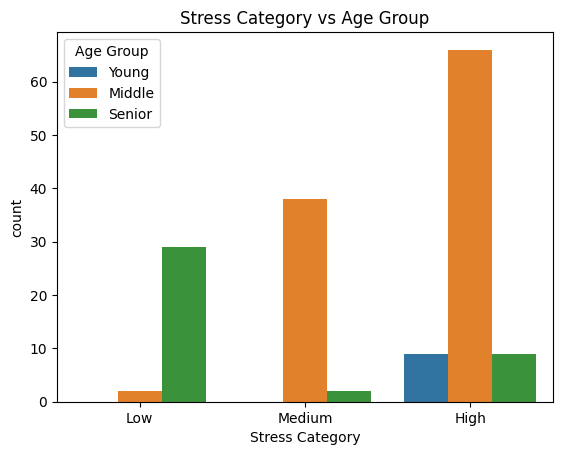

In [ ]:
# Stress Category vs Age Group
sns.countplot(x='Stress Category',hue='Age Group',data=df)
plt.title('Stress Category vs Age Group')
plt.savefig('Stress Category vs Age Group.png')
plt.show()
